**Import libraries**

In [91]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

**Import dataset**

In [92]:
data = pd.read_csv('bank-full.csv',sep=';')

In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Data Preprocessing**

In [94]:
data.shape

(45211, 17)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [96]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [97]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [98]:
data['job'].value_counts() 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [99]:
data['marital'].value_counts() 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [100]:
data['education'].value_counts() 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [101]:

data['y'].value_counts() #Imbalanced DataSet

no     39922
yes     5289
Name: y, dtype: int64

**Data Visualization**

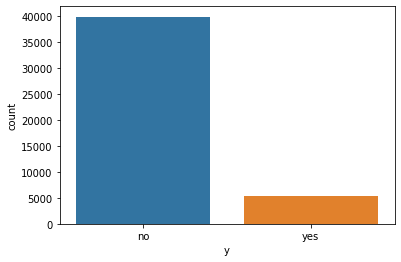

In [102]:
sns.countplot(x='y', data=data)

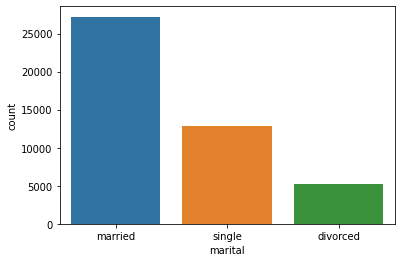

In [103]:
sns.countplot(x='marital', data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

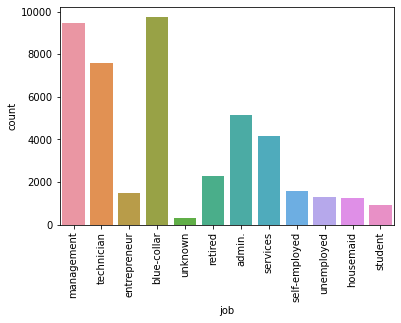

In [104]:
res=sns.countplot(x='job', data=data)
plt.xticks(rotation=90)

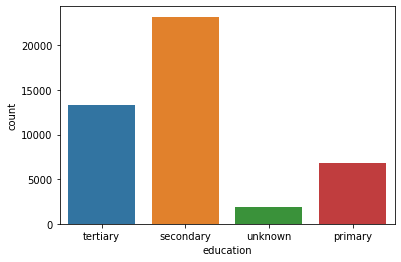

In [105]:
res=sns.countplot(x='education', data=data)

**Coorelation heatmap**

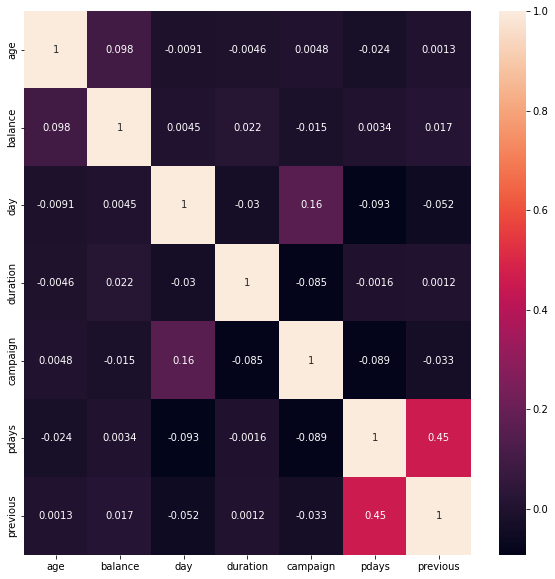

In [106]:
#finding the correlation among the variables

plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [107]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [108]:
data.drop(['contact','default','pdays',],axis=1,inplace=True)

In [109]:
data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'previous', 'poutcome', 'y'],
      dtype='object')

**Handle Categorical features**

In [110]:
le = LabelEncoder()
data.job = le.fit_transform(data.job)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.poutcome = le.fit_transform(data.poutcome)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.month = le.fit_transform(data.month)
data.y = le.fit_transform(data.y)

In [111]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,8,261,1,0,3,0
1,44,9,2,1,29,1,0,5,8,151,1,0,3,0
2,33,2,1,1,2,1,1,5,8,76,1,0,3,0
3,47,1,1,3,1506,1,0,5,8,92,1,0,3,0
4,33,11,2,3,1,0,0,5,8,198,1,0,3,0


**Dependent and independent variables**

In [112]:
x = data.iloc[:,0:13]
y=data.iloc[:,13]


**Train Test Spliting**

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 
print("print shape of x_train",x_train.shape)
print("print shape of y_train",y_train.shape)
print("print shape of x_test",x_test.shape)
print("print shape of y_test",y_test.shape)

print shape of x_train (33908, 13)
print shape of y_train (33908,)
print shape of x_test (11303, 13)
print shape of y_test (11303,)


**ANN**

In [114]:
model = Sequential()
model.add(Dense(24, input_dim=13, activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Compile**

In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


**Training**

In [116]:
history = model.fit(x_train, y_train, epochs=13, batch_size=7, verbose=2,validation_data=(x_test,y_test))

Epoch 1/15
3391/3391 - 7s - loss: 1.6186 - accuracy: 0.8495 - val_loss: 1.4971 - val_accuracy: 0.7354 - 7s/epoch - 2ms/step
Epoch 2/15
3391/3391 - 7s - loss: 0.6369 - accuracy: 0.8676 - val_loss: 0.3482 - val_accuracy: 0.8630 - 7s/epoch - 2ms/step
Epoch 3/15
3391/3391 - 7s - loss: 0.3531 - accuracy: 0.8831 - val_loss: 0.3839 - val_accuracy: 0.8444 - 7s/epoch - 2ms/step
Epoch 4/15
3391/3391 - 7s - loss: 0.3058 - accuracy: 0.8854 - val_loss: 0.3107 - val_accuracy: 0.8808 - 7s/epoch - 2ms/step
Epoch 5/15
3391/3391 - 7s - loss: 0.3003 - accuracy: 0.8868 - val_loss: 0.3124 - val_accuracy: 0.8793 - 7s/epoch - 2ms/step
Epoch 6/15
3391/3391 - 6s - loss: 0.2987 - accuracy: 0.8869 - val_loss: 0.2969 - val_accuracy: 0.8826 - 6s/epoch - 2ms/step
Epoch 7/15
3391/3391 - 7s - loss: 0.2891 - accuracy: 0.8879 - val_loss: 0.2958 - val_accuracy: 0.8811 - 7s/epoch - 2ms/step
Epoch 8/15
3391/3391 - 7s - loss: 0.2857 - accuracy: 0.8872 - val_loss: 0.2928 - val_accuracy: 0.8840 - 7s/epoch - 2ms/step
Epoch 9/

**Evaluation**

In [117]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27779310941696167
Test accuracy: 0.8829514384269714


**Plot Training and validation Accuracy **

<Figure size 432x288 with 0 Axes>

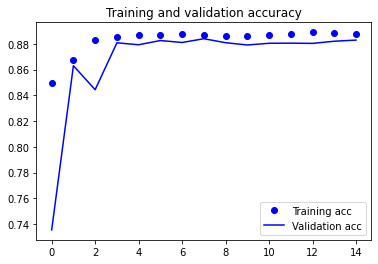

<Figure size 432x288 with 0 Axes>

In [118]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

**Plot training and validation loss**

<Figure size 432x288 with 0 Axes>

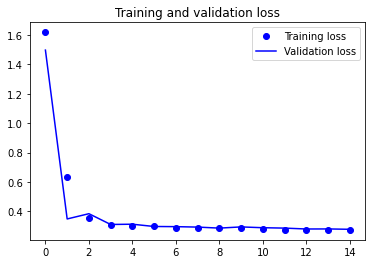

<Figure size 432x288 with 0 Axes>

In [119]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [128]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict classes for test set
yhat_classes = (model.predict(x_test) > 0.4).astype("int32")

**Evaluation metrics**

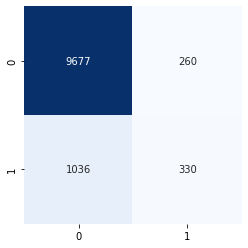

In [129]:
matrix_confusion = confusion_matrix(y_test, yhat_classes)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)